In [1]:
import pandas as pd
import warnings as w
w.filterwarnings("ignore")

C:\Users\USER\AppData\Local\Temp\ipykernel_12164\3313677074.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.groupby(df['left']).mean()

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='salary'>

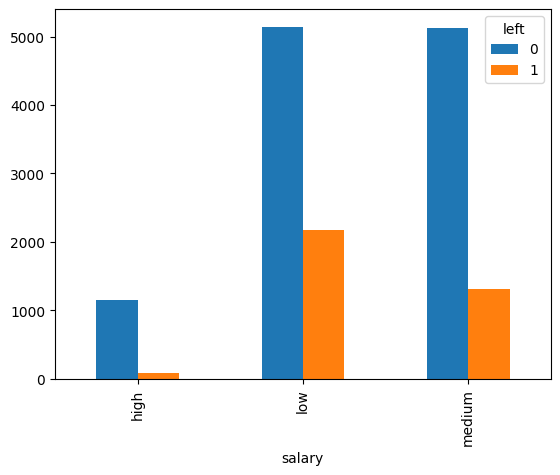

In [5]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<Axes: xlabel='Department'>

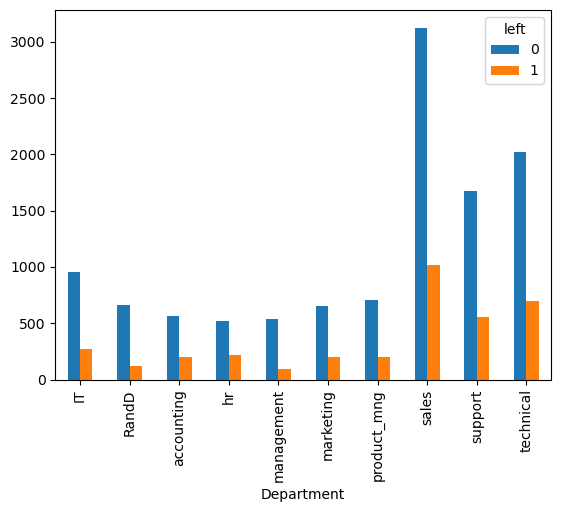

In [49]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [8]:
from sklearn.linear_model import LogisticRegression
x = df.drop(columns=['last_evaluation','number_project','time_spend_company','Work_accident','Department','left'])
y = df['left']

In [9]:
x=pd.get_dummies(x,dtype=int)
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)


In [11]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [12]:
ans=model.predict(x_test)
ans

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
predic=model.predict([[0.37,157,0,1,0,0]])
predic

array([0], dtype=int64)

In [14]:
model.score(x_train,y_train)

0.777237430386697